In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### load cleaned data

In [3]:
df = pd.read_csv('../data/zomato_cleaned.csv')
df

,url,online_order,book_table,rate,votes,rest_type,approx_cost(for two people),listed_in(type),listed_in(city),Afghan,...,Sushi,Tamil,Tea,Tex-Mex,Thai,Tibetan,Turkish,Vegan,Vietnamese,Wraps
0,https://www.zomato.com/bangalore/jalsa-banasha...,Yes,Yes,4.1,775,Casual Dining,800,Buffet,Banashankari,0,...,0,0,0,0,0,0,0,0,0,0
1,https://www.zomato.com/bangalore/spice-elephan...,Yes,No,4.1,787,Casual Dining,800,Buffet,Banashankari,0,...,0,0,0,0,1,0,0,0,0,0
2,https://www.zomato.com/SanchurroBangalore?cont...,Yes,No,3.8,918,"Cafe, Casual Dining",800,Buffet,Banashankari,0,...,0,0,0,0,0,0,0,0,0,0
3,https://www.zomato.com/bangalore/addhuri-udupi...,No,No,3.7,88,Quick Bites,300,Buffet,Banashankari,0,...,0,0,0,0,0,0,0,0,0,0
4,https://www.zomato.com/bangalore/grand-village...,No,No,3.8,166,Casual Dining,600,Buffet,Banashankari,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12924,https://www.zomato.com/bangalore/breakfast-hou...,No,No,3.6,49,Quick Bites,300,Dine-out,Whitefield,0,...,0,0,0,0,0,0,0,0,0,0
12925,https://www.zomato.com/bangalore/fujian-expres...,Yes,No,3.8,182,Food Court,600,Dine-out,Whitefield,0,...,0,0,0,0,1,0,0,0,0,0
12926,https://www.zomato.com/bangalore/nook-aloft-be...,No,Yes,4.2,411,Casual Dining,1800,Dine-out,Whitefield,0,...,0,0,0,0,0,0,0,0,0,0
12927,https://www.zomato.com/bangalore/seeya-restaur...,No,No,3.3,4,Quick Bites,350,Dine-out,Whitefield,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df = df.drop(['url'], axis=1)

In [5]:
df['rate'] = df['rate'].apply(lambda x: 1 if x >= 3.75 else 0)

### data preprocessing

In [6]:
df['online_order'] = df['online_order'].apply(lambda x: 1 if x == 'Yes' else 0)
df['book_table'] = df['book_table'].apply(lambda x: 1 if x == 'Yes' else 0)

In [7]:
x = df.drop(['rate'], axis=1)
y = df['rate']

In [8]:
cat = x.select_dtypes(include='object').columns
numeric = x.select_dtypes(exclude='object').columns

In [9]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop='first')
cat_data = ohe.fit_transform(x[cat]).toarray() 

In [10]:
x = pd.concat([x[numeric], pd.DataFrame(cat_data, columns=ohe.get_feature_names_out(cat))], axis=1)

In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x , y , test_size=0.2, random_state= 42, stratify=y)

In [12]:
y_train.value_counts()

0    5717
1    4626
Name: rate, dtype: int64

In [13]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
x_train , y_train = smote.fit_resample(x_train,y_train)

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
! pip install -up

In [29]:
!pip install -U scikit-learn

  Using cached scikit_learn-1.2.2-cp39-cp39-win_amd64.whl (8.4 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.1.3
    Uninstalling scikit-learn-1.1.3:
      Successfully uninstalled scikit-learn-1.1.3

[notice] A new release of pip available: 22.2 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [33]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [34]:
import sklearn
sklearn.__version__

'1.2.2'

### Model

#### DecisionTree

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5717
           1       1.00      1.00      1.00      5717

    accuracy                           1.00     11434
   macro avg       1.00      1.00      1.00     11434
weighted avg       1.00      1.00      1.00     11434

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1430
           1       0.80      0.82      0.81      1156

    accuracy                           0.83      2586
   macro avg       0.82      0.83      0.82      2586
weighted avg       0.83      0.83      0.83      2586



,Actual,Predicted
12166,0,0
11932,1,1
11915,0,0
4937,0,0
7331,0,0
...,...,...
6951,0,0
313,0,0
5047,0,1
1495,1,1


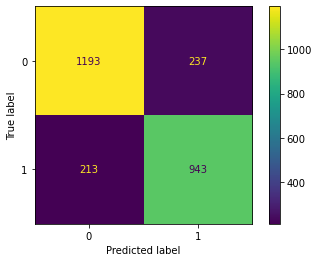

In [35]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train_scaled,y_train)
y_pred_dtc = dtc.predict(x_test_scaled)
print(classification_report(y_train, dtc.predict(x_train_scaled)))
print(classification_report(y_test, y_pred_dtc))
ConfusionMatrixDisplay.from_estimator(dtc, x_test_scaled, y_test)
dt_dataframe = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_dtc})
dt_dataframe

#### RandomForest

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      5717
           1       0.97      0.94      0.96      5717

    accuracy                           0.96     11434
   macro avg       0.96      0.96      0.96     11434
weighted avg       0.96      0.96      0.96     11434

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1430
           1       0.82      0.82      0.82      1156

    accuracy                           0.84      2586
   macro avg       0.84      0.84      0.84      2586
weighted avg       0.84      0.84      0.84      2586



,Actual,Predicted
12166,0,0
11932,1,1
11915,0,0
4937,0,0
7331,0,0
...,...,...
6951,0,0
313,0,0
5047,0,1
1495,1,1


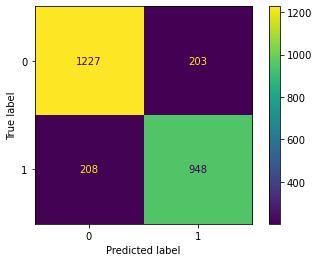

In [36]:
from sklearn.ensemble import RandomForestClassifier
#rf = RandomForestClassifier(max_depth=15, random_state=42, n_estimators=100,min_samples_leaf=4, min_samples_split=2, max_features='sqrt')
rf = RandomForestClassifier( random_state=42, n_estimators=100, max_depth=23, min_samples_leaf=1)
#rf = RandomForestClassifier()
rf.fit(x_train_scaled,y_train)
y_pred_rf = rf.predict(x_test_scaled)
print(classification_report(y_train, rf.predict(x_train_scaled)))
print(classification_report(y_test, y_pred_rf))
ConfusionMatrixDisplay.from_estimator(rf, x_test_scaled, y_test)
rf_dataframe = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf})
rf_dataframe

#### xgboost

              precision    recall  f1-score   support

           0       0.90      0.92      0.91      5717
           1       0.92      0.90      0.91      5717

    accuracy                           0.91     11434
   macro avg       0.91      0.91      0.91     11434
weighted avg       0.91      0.91      0.91     11434

              precision    recall  f1-score   support

           0       0.85      0.86      0.85      1430
           1       0.82      0.81      0.82      1156

    accuracy                           0.84      2586
   macro avg       0.84      0.84      0.84      2586
weighted avg       0.84      0.84      0.84      2586



,Actual,Predicted
12166,0,0
11932,1,1
11915,0,0
4937,0,0
7331,0,0
...,...,...
6951,0,0
313,0,0
5047,0,1
1495,1,1


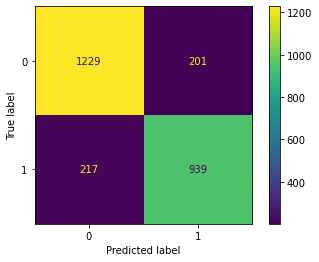

In [37]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_jobs=-1)
xgb.fit(x_train_scaled,y_train)
y_pred_xgb = xgb.predict(x_test_scaled)
print(classification_report(y_train, xgb.predict(x_train_scaled)))
print(classification_report(y_test, y_pred_xgb))
ConfusionMatrixDisplay.from_estimator(xgb, x_test_scaled, y_test)
xgb_dataframe = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_xgb})
xgb_dataframe

#### KNN

evaluation for training 
               precision    recall  f1-score   support

           0       0.68      0.86      0.76      5717
           1       0.80      0.59      0.68      5717

    accuracy                           0.72     11434
   macro avg       0.74      0.72      0.72     11434
weighted avg       0.74      0.72      0.72     11434

evaluation for testing 
               precision    recall  f1-score   support

           0       0.69      0.84      0.76      1430
           1       0.72      0.53      0.61      1156

    accuracy                           0.70      2586
   macro avg       0.71      0.68      0.68      2586
weighted avg       0.70      0.70      0.69      2586



,Actual,Predicted
12166,0,0
11932,1,0
11915,0,0
4937,0,0
7331,0,0
...,...,...
6951,0,1
313,0,0
5047,0,0
1495,1,1


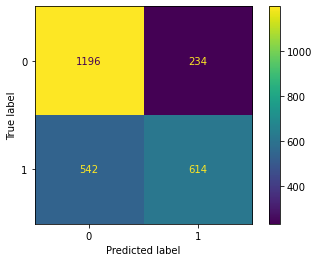

In [38]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(x_train_scaled,y_train)
y_pred_knn = knn.predict(x_test_scaled)
print('evaluation for training \n',classification_report(y_train,knn.predict(x_train_scaled)))
print('evaluation for testing \n',classification_report(y_test,y_pred_knn))
ConfusionMatrixDisplay.from_estimator(knn, x_test_scaled, y_test)
knn_dataframe = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_knn})
knn_dataframe

### hyperparameter tuning

In [39]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [6, 7],
    'gamma': [ 2, 3, 4, 5 ],
    'subsample': [0.4, 0.6],
}
grid_search = GridSearchCV(xgb,param_grid=param_grid,cv=3, n_jobs=-1, verbose=3)
grid_search.fit(x_train_scaled,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     callbacks=None, colsample_bylevel=1,
                                     colsample_bynode=1, colsample_bytree=1,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0, gpu_id=-1,
                                     grow_policy='depthwise',
                                     importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012, max_bin=256,
                                     max_cat_threshold=64, max_cat_to_onehot=4,
                                     max_delta_step=0, max_depth=6,
                                     max_leaves=0, min_child_weight=1,
                                     missing=nan, monotone_constraints='()',
                                     n_estimators=100, n_jobs=-1,
                                     num_parallel_tree=1, predictor='auto',
                                     random_state=0, ...),
             n_jobs=-1,
             param_grid={'gamma': [2, 3, 4, 5], 'max_depth': [6, 7],
                         'subsample': [0.4, 0.6]},
             verbose=3)

In [41]:
final_xgb_pram = grid_search.best_estimator_
final_xgb_pram

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=4, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [42]:
grid_search.best_params_

{'gamma': 4, 'max_depth': 7, 'subsample': 0.6}

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      5717
           1       0.90      0.88      0.89      5717

    accuracy                           0.89     11434
   macro avg       0.89      0.89      0.89     11434
weighted avg       0.89      0.89      0.89     11434

              precision    recall  f1-score   support

           0       0.85      0.86      0.85      1430
           1       0.82      0.81      0.81      1156

    accuracy                           0.83      2586
   macro avg       0.83      0.83      0.83      2586
weighted avg       0.83      0.83      0.83      2586



,Actual,Predicted
12166,0,0
11932,1,1
11915,0,0
4937,0,0
7331,0,0
...,...,...
6951,0,0
313,0,0
5047,0,1
1495,1,1


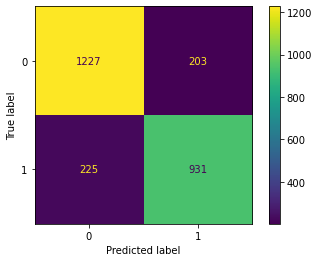

In [43]:
final_xgb_model = XGBClassifier(**grid_search.best_params_)
final_xgb_model.fit(x_train_scaled,y_train)
y_pred_final_xgb_model = final_xgb_model.predict(x_test_scaled)
print(classification_report(y_train, final_xgb_model.predict(x_train_scaled)))
print(classification_report(y_test, y_pred_final_xgb_model))
ConfusionMatrixDisplay.from_estimator(final_xgb_model, x_test_scaled, y_test)
xgb_dataframe = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_final_xgb_model})
xgb_dataframe

### cross validation

In [44]:
from sklearn.model_selection import KFold,cross_validate
kfold = KFold(n_splits=10)
scores = cross_validate(xgb,x_train_scaled,y_train,cv=kfold)
scores

{'fit_time': array([1.03494   , 1.05896425, 0.95887375, 1.01692581, 0.96087432,
        0.93985534, 1.0229311 , 0.94786286, 0.93985534, 0.9448607 ]),
 'score_time': array([0.00800753, 0.00400329, 0.00400329, 0.00500512, 0.00500417,
        0.00500512, 0.004004  , 0.00400352, 0.00400376, 0.00400329]),
 'test_score': array([0.84702797, 0.85402098, 0.81293706, 0.81730769, 0.81539808,
        0.83377078, 0.83902012, 0.80752406, 0.84776903, 0.8407699 ])}

In [45]:
scores['test_score'].mean()

0.8315545674797644

### pipeline

In [69]:
x = df.drop(['rate'], axis=1)
y = df['rate']

In [70]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x , y , test_size=0.2, random_state= 42, stratify=y)

In [71]:
from imblearn.over_sampling import RandomOverSampler

smote = RandomOverSampler()
x_train , y_train = smote.fit_resample(x_train,y_train)

In [72]:
y_train

0        0
1        0
2        1
3        1
4        0
        ..
11429    1
11430    1
11431    1
11432    1
11433    1
Name: rate, Length: 11434, dtype: int64

In [73]:
numeric_columns = x_train.select_dtypes(exclude='object').columns

In [74]:
cat_columns = x_train.select_dtypes(include='object').columns

In [75]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer

In [76]:
numerical_pipeline = Pipeline(steps=[('handle missing value',SimpleImputer(strategy='median')),
                                   ('scaling',StandardScaler(with_mean=False))])

In [77]:
cat_pipeline = Pipeline(steps=[('handle missing value',SimpleImputer(strategy='most_frequent')),
                             ('one hot encoder',OneHotEncoder(drop='first', handle_unknown='ignore')),
                             ('scaling',StandardScaler(with_mean=False))])

In [78]:
preprocessing = ColumnTransformer(transformers=[('numerical_columns',numerical_pipeline,numeric_columns),
                                               ('cat_columns',cat_pipeline,cat_columns)], remainder='passthrough')
preprocessing

ColumnTransformer(remainder='passthrough',
                  transformers=[('numerical_columns',
                                 Pipeline(steps=[('handle missing value',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaling',
                                                  StandardScaler(with_mean=False))]),
                                 Index(['online_order', 'book_table', 'votes', 'approx_cost(for two people)',
       'Afghan', 'Afghani', 'African', 'American', 'Andhra', 'Arabian',
       ...
       'Sushi', 'Tamil', 'Tea',...urkish',
       'Vegan', 'Vietnamese', 'Wraps'],
      dtype='object', length=110)),
                                ('cat_columns',
                                 Pipeline(steps=[('handle missing value',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('one hot encoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore')),
                                                 ('scaling',
                                                  StandardScaler(with_mean=False))]),
                                 Index(['rest_type', 'listed_in(type)', 'listed_in(city)'], dtype='object'))])

In [79]:
final_pipeline = Pipeline(steps=[('preprocessing',preprocessing),
                                ('modeling',XGBClassifier(**grid_search.best_params_))])
final_pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerical_columns',
                                                  Pipeline(steps=[('handle '
                                                                   'missing '
                                                                   'value',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaling',
                                                                   StandardScaler(with_mean=False))]),
                                                  Index(['online_order', 'book_table', 'votes', 'approx_cost(for two people)',
       'Afghan', 'Afghani', 'African', 'American', 'Andhra...
                               feature_types=None, gamma=4, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=7, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [80]:
x_train

,online_order,book_table,votes,rest_type,approx_cost(for two people),listed_in(type),listed_in(city),Afghan,Afghani,African,...,Sushi,Tamil,Tea,Tex-Mex,Thai,Tibetan,Turkish,Vegan,Vietnamese,Wraps
0,0,0,14,"Casual Dining, Bar",700,Dine-out,Bannerghatta Road,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,5,Bakery,350,Delivery,Brigade Road,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,661,Casual Dining,750,Delivery,Bellandur,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,112,Delivery,150,Delivery,Indiranagar,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,16,Quick Bites,300,Dine-out,Koramangala 6th Block,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11429,1,0,488,"Takeaway, Delivery",400,Delivery,Bannerghatta Road,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11430,1,0,358,Quick Bites,400,Delivery,Koramangala 7th Block,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11431,0,1,2946,Pub,1300,Dine-out,Old Airport Road,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11432,1,1,198,Casual Dining,1600,Delivery,Church Street,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
x_train

,online_order,book_table,votes,rest_type,approx_cost(for two people),listed_in(type),listed_in(city),Afghan,Afghani,African,...,Sushi,Tamil,Tea,Tex-Mex,Thai,Tibetan,Turkish,Vegan,Vietnamese,Wraps
0,0,0,14,"Casual Dining, Bar",700,Dine-out,Bannerghatta Road,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,5,Bakery,350,Delivery,Brigade Road,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,661,Casual Dining,750,Delivery,Bellandur,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,112,Delivery,150,Delivery,Indiranagar,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,16,Quick Bites,300,Dine-out,Koramangala 6th Block,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11429,1,0,488,"Takeaway, Delivery",400,Delivery,Bannerghatta Road,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11430,1,0,358,Quick Bites,400,Delivery,Koramangala 7th Block,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11431,0,1,2946,Pub,1300,Dine-out,Old Airport Road,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11432,1,1,198,Casual Dining,1600,Delivery,Church Street,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [82]:
final_pipeline.fit(x_train,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerical_columns',
                                                  Pipeline(steps=[('handle '
                                                                   'missing '
                                                                   'value',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaling',
                                                                   StandardScaler(with_mean=False))]),
                                                  Index(['online_order', 'book_table', 'votes', 'approx_cost(for two people)',
       'Afghan', 'Afghani', 'African', 'American', 'Andhra...
                               feature_types=None, gamma=4, gpu_id=-1,
                               grow_policy='depthwise', importance_type=None,
                               interaction_constraints='',
                               learning_rate=0.300000012, max_bin=256,
                               max_cat_threshold=64, max_cat_to_onehot=4,
                               max_delta_step=0, max_depth=7, max_leaves=0,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=0, num_parallel_tree=1, predictor='auto',
                               random_state=0, ...))])

In [83]:
y_pred_final = final_pipeline.predict(x_test)

c:\Users\Yousef\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [84]:
import joblib
joblib.dump(final_pipeline,'../models/final_model.pkl')

['../models/final_model.pkl']

In [85]:
model = joblib.load('../models/final_model.pkl')

### func to make multilabel binarizer

In [86]:
cuisines_list = pd.read_csv('../data/cuisines.csv')
cuisines_list = cuisines_list.columns.tolist()

In [87]:
def multilabel_binarizer(inputs, labeles):
    bi_list = []
    for i in labeles:
        if i in inputs:
            bi_list.append(1)
        else:
            bi_list.append(0)
    return pd.DataFrame([bi_list], columns=labeles)

In [88]:
binarizer_df = multilabel_binarizer(['Afghan', 'Mughlai'], cuisines_list)

In [89]:
x_train.head(2)

,online_order,book_table,votes,rest_type,approx_cost(for two people),listed_in(type),listed_in(city),Afghan,Afghani,African,...,Sushi,Tamil,Tea,Tex-Mex,Thai,Tibetan,Turkish,Vegan,Vietnamese,Wraps
0,0,0,14,"Casual Dining, Bar",700,Dine-out,Bannerghatta Road,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,5,Bakery,350,Delivery,Brigade Road,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [90]:
prediction = model.predict(pd.concat([pd.DataFrame({'online_order':[1],'book_table':[0],'votes':[231],'rest_type':['Casual Dining'],'approx_cost(for two people)':[100],'listed_in(type)':['Buffet'],'listed_in(city)':['Malleshwaram']}), binarizer_df], axis=1))
prediction

array([1])